In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization, Activation
from matplotlib import pyplot as plt
import seaborn as sns

Exploratory Data Analysis

1.   List item
2.   List item



In [34]:
# url = 'https://raw.githubusercontent.com/MatthiasYeoEeLiang/BT4012-Project/Matthias/card_transdata.csv?token=GHSAT0AAAAAABZWAKOB7BTJSBUXISEG3A3KY2BJEFQ'
df = pd.read_csv("card_transdata.csv")
# print(df)
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#data type for variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [36]:
#check if there is any missing data
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Categorical data:
1. Repeat Retailer
2. Used Chip
3. Used Pin Number
4. Online Order
5. Fraud

Numerical Data:
1. Distance from home
2. Distance from last transition
3. Ratio to Median Purchase time

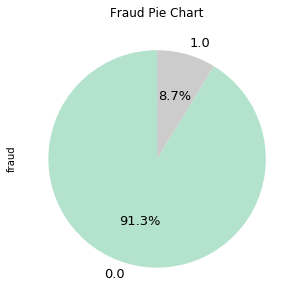

In [46]:
#UNIVARIATE ANALYSIS
#count of fraud and non-fraud cases
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Fraud Pie Chart'
)

df['fraud'].value_counts().plot.pie(**kwargs)




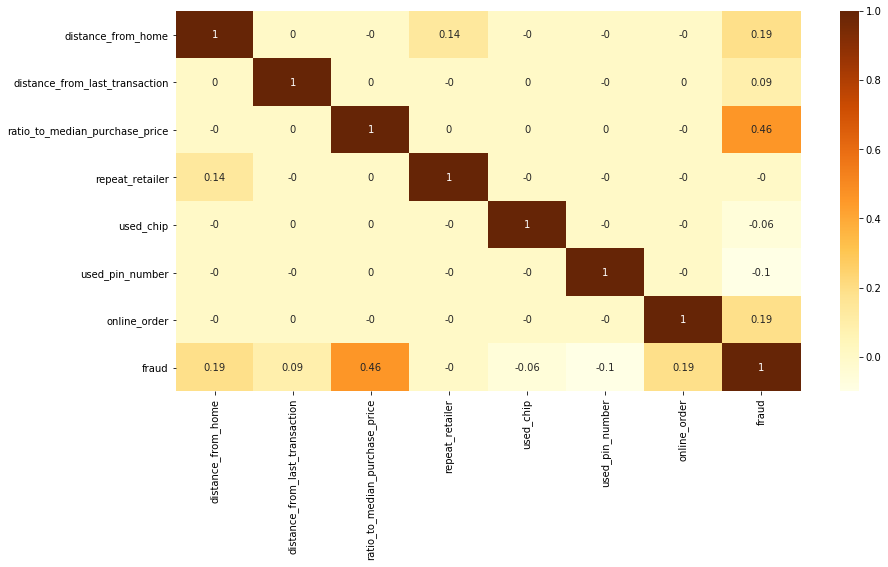

In [52]:
#BIVARIATE ANALYSIS
#correlation heatmap
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [53]:
# from scipy import stats
# #BIVARIATE ANALYSIS
# # df.columns.values.tolist()
# #cat vs cat
# cat_variables = ['repeat_retailer','used_chip','used_pin_number','online_order','fraud']

# p_values = []
# chai_stats = []
# for cat1 in cat_variables:
#     for cat2 in cat_variables:
#             crosstab = pd.crosstab(df[cat1], df[cat2])
#             chai2, p_val, _, _ = stats.chi2_contingency(crosstab)
#             p_values.append((cat1, cat2, p_val))
#             chai_stats.append((cat1, cat2, chai2))
     

# chisquare = pd.DataFrame(p_values, columns=['cat1', 'cat2', 'p-value'])
# chisquare.pivot_table(index='cat1', columns='cat2', values='p-value')


cat2,fraud,online_order,repeat_retailer,used_chip,used_pin_number
cat1,,,,,
fraud,0.000000,0.000000,0.176384,0.000000,0.000000
online_order,0.000000,0.000000,0.596807,0.828524,0.773724
repeat_retailer,0.176384,0.596807,0.000000,0.179747,0.680158
used_chip,0.000000,0.828524,0.179747,0.000000,0.164619
used_pin_number,0.000000,0.773724,0.680158,0.164619,0.000000


In [13]:
fraud_df = df.loc[df['fraud'] == 1]
fraud_df.ratio_to_median_purchase_price.describe()

count    87403.000000
mean         6.006323
std          5.564320
min          0.011966
25%          3.500270
50%          5.071294
75%          7.331222
max        266.689692
Name: ratio_to_median_purchase_price, dtype: float64

In [14]:
non_fraud_df = df.loc[df['fraud'] != 1]
non_fraud_df.ratio_to_median_purchase_price.describe()

count    912597.000000
mean          1.423642
std           1.946152
min           0.004399
25%           0.449768
50%           0.913950
75%           1.788918
max         267.802942
Name: ratio_to_median_purchase_price, dtype: float64

As shown above, fraud cases tend to have a higher transation amount.

good notebook: https://www.kaggle.com/code/raphaelmarconato/credit-card-fraud-eda-and-ml